## LSPR: Pygbe vs analytical (experimental data)

We run pygbe and the analytical solution for the Cext calculation for the cases we have experimental data. We compare the error between these runs and analyze the results. 

We run both silver and gold, using the data from [Johnson and Christy, 1972](https://journals.aps.org/prb/pdf/10.1103/PhysRevB.6.4370). We run meshes from 2K elements of a nanoparticle of radius 10nm.

### Silver



In [1]:
import numpy

In [2]:
#import data
lambda_s , n_s , k_s = numpy.loadtxt('gold_silver_water_raw-data/silver_JC72.txt', unpack=True)
lambda_s = lambda_s*1e3 #To convert to nm

### Water interpolation data for lambda_silver

We need to obtain the refractive index for the same wavelengths we have data for the silver case. We will save the data on a file for futere purposes. 

In [3]:
from data_analysis_helper import linear_interp

In [4]:
lambda_w , n_w , k_w = numpy.loadtxt('gold_silver_water_raw-data/water_HQ72.txt', unpack=True)
lambda_w = lambda_w*1e3 #To convert to nm

In [5]:
#linear interpolation
water_real_linear , water_imag_linear = linear_interp(lambda_w, n_w, k_w)

In [6]:
print(min(lambda_s))
print(min(lambda_w))
print(max(lambda_s))
print(max(lambda_w))

187.9
200.0
1937.0
2000.0


Our water data starts at a wavelength of 200 nm, therefore we can interpolate values smaller than that. So we will strip out the values for the silver wavelengths that are not in the water interpolation range. 

In [7]:
numpy.where(lambda_s<200.0)

(array([0, 1, 2, 3]),)

In [8]:
lambda_ws = lambda_s[4:]

In [9]:
n_s = n_s[4:]
k_s = k_s[4:]

In [10]:
#lambda_sw

In [11]:
n_ws = water_real_linear(lambda_ws)
k_ws = water_imag_linear(lambda_ws)

In [181]:
numpy.savetxt('water_refrac_nm.txt', list(zip(lambda_ws, n_ws, k_ws)), header='lambda, refrac_index_real, refrac_index_imag ')

In [13]:
refrac_silver = n_s + 1j * k_s
refrac_water  = n_ws + 1j * k_ws

In [1]:
#refrac_water[23] 

In [2]:
#refrac_silver

In [15]:
diel_silver = refrac_silver * refrac_silver 
diel_water  = refrac_water * refrac_water

In [16]:
l_diel_silver = [str(d) for d in diel_silver]
l_diel_water = [str(d) for d in diel_water]

In [17]:
for j in range(len(l_diel_silver)):
    l_diel_silver[j] = l_diel_silver[j][1:-1]

In [18]:
for j in range(len(l_diel_water)):
    l_diel_water[j] = l_diel_water[j][1:-1]

In [19]:
#diel_silv = list(diel_silver)
#diel_wat = list(diel_water)
lamb_ws = list(lambda_ws)

In [20]:
lst_d = list(zip(l_diel_water, l_diel_silver)) 

In [21]:
for j in range(len(lst_d)):
    lst_d[j] = list(lst_d[j])

In [22]:
#lst_d

In [23]:
wave_diel_sil_wat = list(zip(lambda_ws, lst_d))

In [24]:
wave_diel_sil_wat[23]

(381.5, ['1.7968866304+8.240198656e-09j', '-3.471996+0.1864j'])

In [25]:
import pygbe

In [26]:
from pygbe.util.read_data import readFields

In [27]:
from pygbe.main import main

In [29]:
field_test= readFields('sphere_complex.config')


In [30]:
field_test

{'E': ['1.7956+8.5e-9j', '-3.3829+0.19136j'],
 'LorY': ['1', '1'],
 'Nchild': ['1', '0'],
 'Nparent': ['0', '1'],
 'charges': ['0', '0'],
 'child': ['0'],
 'coulomb': ['0', '0'],
 'kappa': ['1e-12', '1e-12'],
 'parent': ['NA', '0'],
 'pot': ['0', '0'],
 'qfile': ['NA', 'NA']}

In [31]:
#results = main(['', '/home/ncclementi/Documents/git/pygbe_dev/pygbe/examples/lspr'], field=field_test, return_results_dict=True)


In [32]:
import time

In [33]:
tic = time.time()
Cext = []
for wave, E in wave_diel_sil_wat:
    field_test['E'] = E #if here then 1st value of 'E' has to match 1st value in the E list 
    results = main(['', '/home/ncclementi/Documents/git/pygbe_dev/pygbe/examples/lspr'], field=field_test, lspr=(-1,wave), return_results_dict=True)
    Cext.append(results['Cext'])
toc = time.time()
f_loop_time = toc - tic
print('Run all the cases took: {}'.format(f_loop_time))

Run started on:
	Date: 2017/2/13
	Time: 9:38:5
	PyGBe version: 0.2.1+236.g6bf08a0
Config file: /home/ncclementi/Documents/git/pygbe_dev/pygbe/examples/lspr/sphere_complex.config
Parameter file: /home/ncclementi/Documents/git/pygbe_dev/pygbe/examples/lspr/sphere_complex.param
Geometry folder: /home/ncclementi/Documents/git/pygbe_dev/pygbe/examples/lspr/geometry
Running in: /home/ncclementi/Documents/git/pygbe_dev/pygbe/examples/lspr

Reading surface 0 from file geometry/sphere2K_R10
Time load mesh: 0.22481131553649902
Removed areas=0: 0

Total elements : 2048
Total equations: 4096
----------------------------

1 surfaces:

Surface 0:
	2048 elements
	Surface type       : dielectric_interface
	Cells              : 9
	Twigs              : 8
	Levels             : 2
	C0 size            : 9.978611958305848
	C0 box center      : 0.0, 0.0, 0.0
	Twig cell size     : 4.989305979152924
	Rbox/theta         : 9.978611958305848
	Analytic distance  : 2.197623822113438
	Elem. per sq Ang   : 1.634935703

In [34]:
f_loop_time

680.0566599369049

In [40]:
lamb_ws[23]


381.5

In [39]:
Cext[23]

[5993.106800304472]

In [147]:
cext = []
for c in Cext:
    cext.append(c[0])

In [160]:
len(cext)

45

In [148]:
wavelength_refrac = lamb_ws

In [149]:
refrac_in = refrac_silver
refrac_out = refrac_water

In [150]:
diel_in  = refrac_in*refrac_in
diel_out = refrac_out*refrac_out

In [151]:
diel_in[23]

(-3.4719960000000003+0.18640000000000001j)

In [152]:
diel_out[23]

(1.7968866303999997+8.2401986559999985e-09j)

In [153]:
radius = 10

In [154]:
def Cext_analytical(radius, wavelength_refrac, refrac_in, refrac_out):
    diel_in  = refrac_in*refrac_in
    diel_out = refrac_out*refrac_out

    wavenumber = 2*numpy.pi*refrac_out/wavelength_refrac
    C1 = wavenumber**2*(diel_in/diel_out-1)/(diel_in/diel_out+2)
    Cext_an = 4*numpy.pi*radius**3/wavenumber.real * C1.imag 
    
    return Cext_an

In [155]:
Cext_an = Cext_analytical(radius, wavelength_refrac, refrac_in, refrac_out)

In [118]:
#c_an_381_test = Cext_analytical(radius, 381.5, refrac_in[23], refrac_out[23])

In [156]:
#c_an_381_test

In [157]:
(Cext_an)

array([  4.40687022e+02,   4.30112437e+02,   4.19582679e+02,
         4.08557745e+02,   3.92222281e+02,   3.81036528e+02,
         3.70769117e+02,   3.63992520e+02,   3.52977862e+02,
         3.43497300e+02,   3.30746537e+02,   3.15861351e+02,
         2.96751839e+02,   2.74005557e+02,   2.52342282e+02,
         2.27359570e+02,   1.85059226e+02,   1.15675733e+02,
         6.56868685e+01,   5.54214221e+01,   9.72410551e+01,
         1.73567071e+02,   4.55662314e+02,   5.62320085e+03,
         5.62867938e+02,   1.21167157e+02,   4.19035053e+01,
         2.19141345e+01,   1.57888279e+01,   9.74575632e+00,
         6.39195486e+00,   5.07618044e+00,   2.89182348e+00,
         2.41059251e+00,   1.38483977e+00,   7.77178322e-01,
         4.04506099e-01,   3.62222323e-01,   2.38227144e-01,
         1.53520357e-01,   9.75402446e-02,   1.32577879e-01,
         1.22810662e-01,   7.28265981e-02,   1.16484000e-01])

In [161]:
cext_an = list(Cext_an)

In [180]:
cext_an[10]

330.74653702280926

In [162]:
err = []
for i in range(len(Cext)):
    err.append(abs(cext[i]-cext_an[i])/cext_an[i])


In [163]:
numpy.savetxt('cext_err.txt', list(zip(lambda_ws, cext, cext_an, err)))

In [164]:
from matplotlib import pyplot
%matplotlib notebook

from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 14

<IPython.core.display.Javascript object>


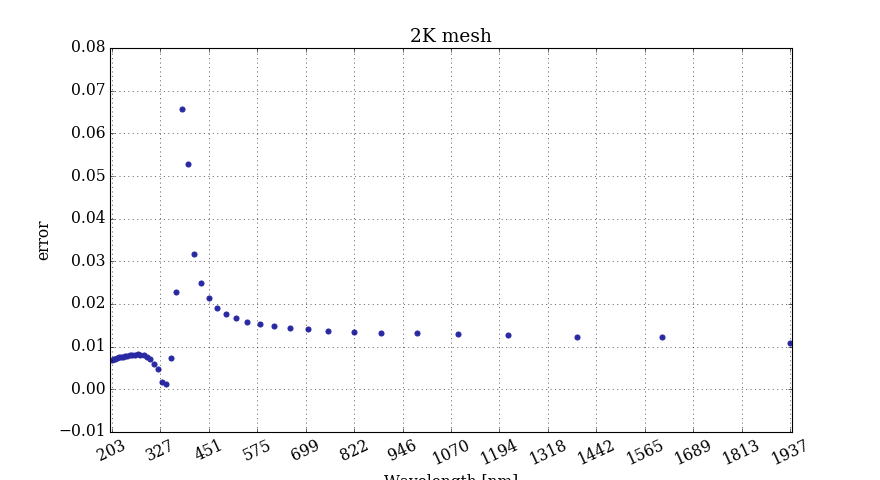

In [165]:
pyplot.figure(figsize=(11,6))  

pyplot.scatter(lambda_ws, err, color='#2929a3') 
    
pyplot.xlabel('Wavelength [nm]')
pyplot.ylabel('error')
pyplot.title('2K mesh')
pyplot.xlim(min(lambda_ws)-5, max(lambda_ws)+5)
pyplot.xticks(numpy.linspace(min(lambda_ws), max(lambda_ws), 15), rotation=25)

pyplot.grid()



In [131]:
numpy.where(lambda_ws == 354.2)


(array([21]),)

In [133]:
lambda_ws

array([  203.3,   207.3,   211.9,   216.4,   221.4,   226.2,   231.3,
         237.1,   242.6,   249. ,   255.1,   261.6,   268.9,   276.1,
         284.4,   292.4,   300.9,   310.7,   320.4,   331.5,   342.5,
         354.2,   367.9,   381.5,   397.4,   413.3,   430.5,   450.9,
         471.4,   495.9,   520.9,   548.6,   582.1,   616.8,   659.5,
         704.5,   756. ,   821.1,   892. ,   984. ,  1088. ,  1216. ,
        1393. ,  1610. ,  1937. ])

In [134]:
numpy.where(lambda_ws < 500)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),)

In [135]:
lambda_ws[29]

495.90000000000003

In [137]:
tic_8 = time.time()
Cext_8k = []
for wave, E in wave_diel_sil_wat[21:30]:
    field_test['E'] = E #if here then 1st value of 'E' has to match 1st value in the E list 
    results_8 = main(['', '/home/ncclementi/Documents/git/pygbe_dev/pygbe/examples/lspr'], field=field_test, lspr=(-1,wave), return_results_dict=True)
    Cext_8k.append(results_8['Cext'])
toc_8 = time.time()
f_loop_time_8 = toc_8 - tic_8
#print('Run all the cases took: {}'.format(f_loop_time))

In [145]:
Cext_8k

[[173.9107156741176],
 [458.4225943511492],
 [5722.6518464618775],
 [554.79310640197718],
 [120.14474888610077],
 [41.626108723601071],
 [21.790282144362333],
 [15.709228029069605],
 [9.7005477932391191]]

In [178]:
f_loop_time_8

917.4546434879303

In [166]:
cext_8k = []
for c in Cext_8k:
    cext_8k.append(c[0])

In [167]:
err_8k = []
for i in range(len(cext_8k)):
    err_8k.append(abs(cext_8k[i]-cext_an[21:30][i])/cext_an[21:30][i])


In [168]:
numpy.savetxt('cext_err_8k.txt', list(zip(lambda_ws[21:30], cext, cext_an[21:30], err_8k )))

In [169]:
lamb_zoom = lambda_ws[21:30]

In [170]:
len(lamb_zoom)

9

In [171]:
len(err_8k)

9

<IPython.core.display.Javascript object>


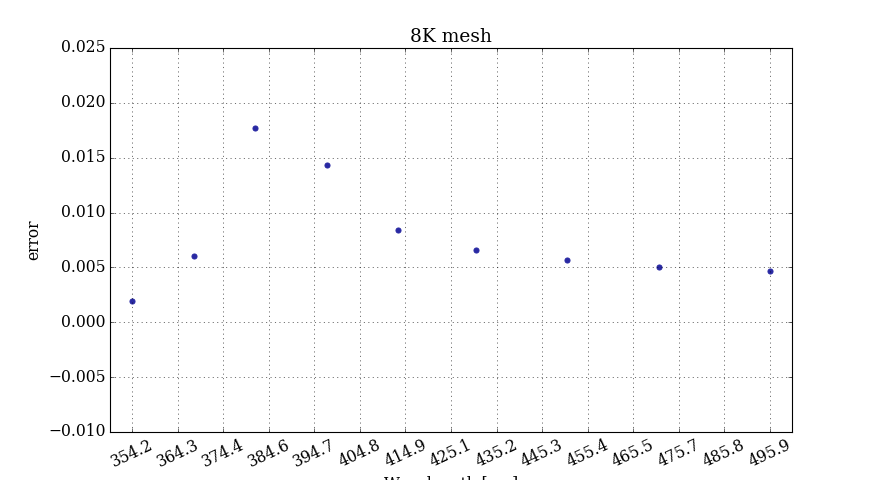

In [172]:
pyplot.figure(figsize=(11,6))  

pyplot.scatter(lamb_zoom, err_8k, color='#2929a3') 
    
pyplot.xlabel('Wavelength [nm]')
pyplot.ylabel('error')
pyplot.title('8K mesh')
pyplot.xlim(min(lamb_zoom)-5, max(lamb_zoom)+5)
pyplot.xticks(numpy.linspace(min(lamb_zoom), max(lamb_zoom), 15), rotation=25)

pyplot.grid()

<IPython.core.display.Javascript object>


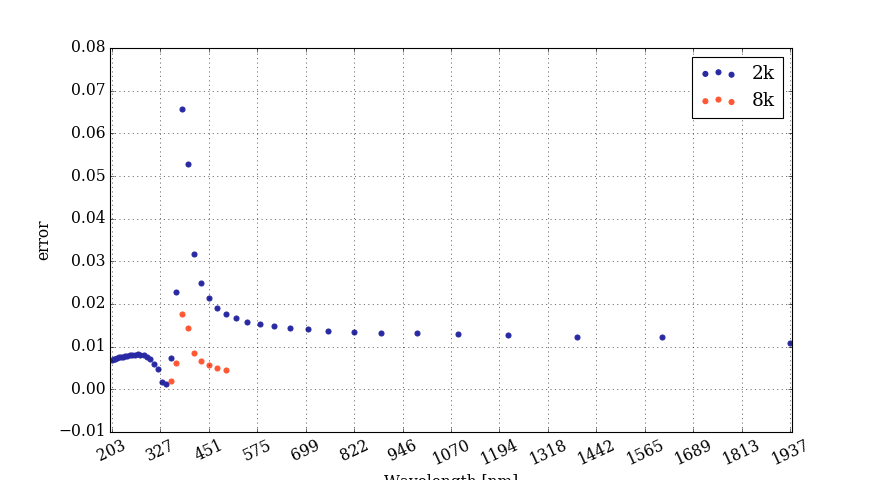

In [177]:
pyplot.figure(figsize=(11,6))  

pyplot.scatter(lambda_ws, err, color='#2929a3', label='2k') 
pyplot.scatter(lamb_zoom, err_8k, color='#ff5733', label='8k') 
    
pyplot.xlabel('Wavelength [nm]')
pyplot.ylabel('error')
pyplot.legend(loc='best')
#pyplot.title('2K mesh')
pyplot.xlim(min(lambda_ws)-5, max(lambda_ws)+5)
pyplot.xticks(numpy.linspace(min(lambda_ws), max(lambda_ws), 15), rotation=25)

pyplot.grid()

In [174]:
cext_ref =  cext.copy()
cext_ref[21:30] = cext_8k

[437.69888551751615,
 427.1042480238973,
 416.58133545649912,
 405.57394776721577,
 389.28950176554412,
 378.15982920237025,
 367.91968857436893,
 361.17626983359537,
 350.20181136592316,
 340.76379777332363,
 328.08271955431485,
 313.29888157931777,
 294.32661882074683,
 271.77276398764315,
 250.33285353449202,
 225.62248063229831,
 183.74931160084816,
 114.98630688213424,
 65.369347213519873,
 55.331500678887302,
 97.369693163439919,
 174.85355247065553,
 466.05275951439182,
 5993.106800304472,
 533.09435341644632,
 117.33665520675623,
 40.857381238750158,
 21.44507651820242,
 15.486430162555727,
 9.5736253577384769,
 6.2856622171566228,
 4.9959150456519827,
 2.8478232247104627,
 2.3750624087458445,
 1.3649757149704607,
 0.76627395021129874,
 0.39893925908568129,
 0.35732366692277423,
 0.23505507348536117,
 0.15150419074613547,
 0.096275098705735584,
 0.1308796193721905,
 0.12129163449154431,
 0.071930285185090162,
 0.11521508682630509]